# *Statistics coded*: "Social media - statistics on the use by enterprises"

Prepared by [**beatrizq**](beatriz.querido@gmail.com) ([LinkedIn](https://www.linkedin.com/in/beatrizque/)).

This notebook aims at reproducing the figures of the original *Statistics Explained* article on [**social media - statistics on the use by enterprises**](https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Social_media_-_statistics_on_the_use_by_enterprises).

## Configuration

- Installing the [_Eurostat_ API](https://github.com/opus-42/eurostat-api-client)
- Importing the necessary libraries for data representation, extraction and visualization, as well as specific dependencies of the API
- Adjusting the settings for the API

In [1]:
#data representation
import numpy as np
import pandas as pd

#data extraction
#pip install eurostatapiclient --no-dependencies
#conda install eurostatapiclient --no-deps
import requests
import certifi
import chardet
import idna
import pytz
import six
import urllib3
import dateutil
from eurostatapiclient import EurostatAPIClient

#data visualization
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
import seaborn as sns

#settings for EurostatAPIClient
VERSION = 'v2.1'
FORMAT = 'json'
LANGUAGE = 'en'
client = EurostatAPIClient(VERSION, FORMAT, LANGUAGE)

## Data extraction

In order to load the relevant data, these steps were followed:
- use the Eurostat query builder for `JSON`-stat format Web Services to filter the relevant datasets, using the respective dataset code and according to the codes explained below;
- use the generated query code as parameter for the client.get_dataset function (included in the `EurostatAPIClient` library)

Relevant datasets considered were:
- `"isoc_cismt"`: Social media use by type, internet advertising
- `"isoc_cismp"`: Social media use by purpose

In [3]:
### FILTER CODES ###

#UNIT:
#% of enterprises: PC_ENT
#% of enterprises using social media: PC_ENT_SM

#SIZE:
#large: L_C10_S951_XK
#medium: M_C10_S951_XK
#small: S_C10_S951_XK

#PURPOSE:
#develop=E_SM_PADVERT
#obtain=E_SM_PCUQOR
#recruit=E_SM_PRCR
#involve=E_SM_PCUDEV
#exchange = E_SM_PEXCHVOC
#collaborate = E_SM_PBPCOLL

#TYPE OF SOCIAL MEDIA:
#only one type of social media = E_SM1_1
#any social media = E_SM1_ANY
#two or more types = E_SM1_GE2
#enterprise's blog or microblogs = E_SM1_BLOG
#multimedia content sharing websites = E_SM1_CNTSHR
#social networks = E_SM1_SNET
#wiki based knowledge sharing tools = E_SM1_WIKI

#ACTIVITY:
#transportation and storage = 10_H49_53
#construction = 10_F41_43
#electricity = 10_D35_E39
#administrative = 10_N77_82
#professional = 10_M69_74
#manufacturing = 10_C10_33
#information = 10_J58_63
#real estate = 10_L68
#wholesale = 10_G45_47
#retail trade = 10_G47
#accommodation = 10_I55

## Use of social media by enterprises

Table 1: Enterprises using social media, 2019, (% of enterprises) - Source: _Eurostat_ ([isoc_cismt](https://www.coursera.org/specializations/deep-learning#courses))

### Table 1

#### Step 1: Understanding the table

- it shows the percentage of enterprises using each type of social media in each country, in 2019;
- countries are represented in the rows; social media types correspond to the columns

#### Step 2: Data extraction and preparation

- dataset code used: `"isoc_cismt"`;
- all relevant data was imported into a single dataframe and then:
    - restructured: using the `set_index` and `unstack` commands to convert the social media entries        in the original indic_is column into new columns;
    - reordered: using the `loc` command to form a new dataframe according to the original row and column orders;
    - renamed: using the `rename* command to replace codes with the proper strings

In [57]:
#TABLE 1: data extraction
#source: Eurostat API (isoc_cismt)

#get data
table1_source = 'isoc_cismt?precision=1&geo=AT&geo=BA&geo=BE&geo=BG&geo=CY&geo=CZ&geo=DE&geo=DK&geo=EE&geo=EL&geo=ES&geo=EU28&geo=FI&geo=FR&geo=HR&geo=HU&geo=IE&geo=IS&geo=IT&geo=LT&geo=LU&geo=LV&geo=ME&geo=MT&geo=NL&geo=NO&geo=PL&geo=PT&geo=RO&geo=RS&geo=SE&geo=SI&geo=SK&geo=TR&geo=UK&unit=PC_ENT&indic_is=E_SM1_1&indic_is=E_SM1_ANY&indic_is=E_SM1_BLOG&indic_is=E_SM1_CNTSHR&indic_is=E_SM1_GE2&indic_is=E_SM1_SNET&indic_is=E_SM1_WIKI&sizen_r2=10_C10_S951_XK&unitLabel=label&time=2019'

df_table1 = client.get_dataset(table1_source).to_dataframe()


In [58]:
#TABLE 1: data preparation

df_table1_restructured = df_table1.loc[:,['values','indic_is','geo']].set_index(['geo', 'indic_is'])['values'].unstack()

order_col = ['E_SM1_SNET', 'E_SM1_BLOG', 'E_SM1_CNTSHR', 'E_SM1_WIKI', 'E_SM1_1', 'E_SM1_GE2', 'E_SM1_ANY']
order_row = ['EU28','BE','BG','CZ','DK','DE','EE','IE','EL','ES','FR','HR','IT','CY','LV','LT','LU','HU','MT','NL','AT','PL','PT','RO','SI','SK','FI','SE','UK','IS','NO','ME','RS','TR','BA']

df_table1_reordered = df_table1_restructured.loc[order_row, order_col]

countries_names = {'AT':'Austria', 'BE':'Belgium', 'BG':'Bulgaria', 'CY': 'Cyprus', 'CZ': 'Czechia', 'DE': 'Germany', 'DK':'Denmark', 'EE':'Estonia', 'EL': 'Greece', 'ES':'Spain', 'FI':'Finland', 'FR':'France', 'HR':'Croatia', 'HU':'Hungary', 'IE':'Ireland', 'IT':'Italy', 'LT':'Lithuania', 'LU':'Luxembourg', 'LV':'Latvia', 'MT':'Malta', 'NL':'Netherlands', 'PL':'Poland', 'PT':'Portugal', 'RO':'Romania', 'SE':'Sweden', 'SI':'Slovenia','SK':'Slovakia', 'UK':'United Kingdom', 'EU28': 'EU-28','TR':'Turkey','CH':'Switzerland', 'IS':'Iceland', 'MK':'North Macedonia','ME':'Montenegro',
'NO':'Norway', 'RS': 'Serbia', 'BA': 'Bosnia and Herzegovina'}

media_types = {'E_SM1_SNET':'Social networks', 'E_SM1_CNTSHR':'Multimedia content-sharing websites', 'E_SM1_BLOG':'Enterprise blog or microblogs', 'E_SM1_WIKI':'Wiki-based knowledge- sharing tools', 'E_SM1_1': 'Use only one type of social media (*)', 'E_SM1_GE2':'Use two or more types of social media (*)', 'E_SM1_ANY': 'Use at least one type of social media (*)'}

df_table1_renamed = df_table1_reordered.rename(countries_names, axis='index')
df_table1_renamed = df_table1_renamed.rename(media_types, axis='columns')
#df_table1_renamed.index.name = None
#print(df_table1_renamed)
df_table1_renamed.style

## Types of social media used over time (2013-2019)

### Figure 1

#### Step 1: Understanding the graph

- the graph corresponds to a line plot
- each line represents a different type of social media and shows the percentage of enterprises using that specific type over time

#### Step 2: Data extraction and preparation

- dataset code used: `"isoc_cismt"`;
- as any indicators for the year 2013 were distinguished from the rest, we had to import data from that year and data from the other years separately and combine the two dataframes together afterwards; 
- we then created a dataframe for each type of social media containing the percentage values per year

In [14]:
#FIGURE 1: data
#source: Eurostat API (isoc_cismt)

#get data
figure1a_source = 'isoc_cismt?precision=1&geo=EU28&unit=PC_ENT&indic_is=E_SM_BLOG&indic_is=E_SM_CNTSHR&indic_is=E_SM_SNET&indic_is=E_SM_WIKI&sizen_r2=10_C10_S951_XK&unitLabel=label&time=2013&time=2015&time=2017&time=2019'
dataframe_figure1a = client.get_dataset(figure1a_source).to_dataframe()

figure1b_source = 'isoc_cismt?groupedIndicators=1&precision=1&geo=EU28&unit=PC_ENT&indic_is=E_SM1_BLOG&indic_is=E_SM1_CNTSHR&indic_is=E_SM1_SNET&indic_is=E_SM1_WIKI&sizen_r2=10_C10_S951_XK&unitLabel=label&time=2013&time=2015&time=2017&time=2019'
dataframe_figure1b = client.get_dataset(figure1b_source).to_dataframe()

dataframe_figure1 = dataframe_figure1a.copy().fillna(dataframe_figure1b)

dataframe_figure1_blog = dataframe_figure1.loc[dataframe_figure1['indic_is'] == 'E_SM_BLOG'].groupby(by = 'time')['values'].sum()
dataframe_figure1_cntshr = dataframe_figure1.loc[dataframe_figure1['indic_is'] == 'E_SM_CNTSHR'].groupby(by = 'time')['values'].sum()
dataframe_figure1_snet = dataframe_figure1.loc[dataframe_figure1['indic_is'] == 'E_SM_SNET'].groupby(by = 'time')['values'].sum()
dataframe_figure1_wiki = dataframe_figure1.loc[dataframe_figure1['indic_is'] == 'E_SM_WIKI'].groupby(by = 'time')['values'].sum()


#### Step 3: Plotting

- all plotting functions belong to the `matplotlib` library; 
- first off, we created the figure and axis and established the image size;
- then, we configured layout elements such as the sheet style, grid, spines and size of the labels;
- the axis were also adjusted, regarding the ticks and limit;
- using the `plt.plot` command, we plotted the lines while setting different colors and specifying the `linestyle`;
- legends representing each social media type were first created separately and then displayed in a specific way: next to each other or on top of each other; 
- finally, the title was created, minding the original line breaks 

**NB. These steps apply to all figures and will not be repeated throughout this notebook's explanation sections**

Text(-0.03, 1.05, 'Enterprises using social media, by type of social media, EU-28, \n2013, 2015, 2017 and 2019 \n(% of enterprises)')

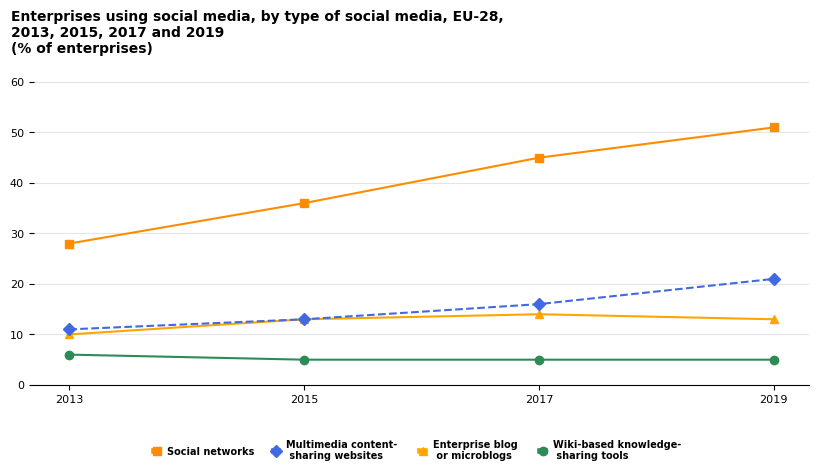

In [17]:
#FIGURE 1: graph

#size of graph
fig, ax = plt.subplots(figsize=(10, 4))

#grid
plt.style.use('default') #aesthetic of sheet
ax.grid(True, which = 'major', axis = 'y' , color ='grey', linestyle = '-', alpha = 0.2) #grey lines
sns.despine(top=True, right=True, left=True, bottom=False) #remove spines
ax.tick_params(axis = 'both',which = 'major' , labelsize = 8) #size of labels in axis

#scale of graph
plt.ylim(0,61)
plt.yticks(np.arange(0, 61, step=10))

#plot the data
plt.plot(dataframe_figure1_blog, color='orange', marker ='^')
plt.plot(dataframe_figure1_cntshr, color='royalblue', marker ='D', linestyle = 'dashed')
plt.plot(dataframe_figure1_snet, color='darkorange', marker ='s')
plt.plot(dataframe_figure1_wiki, color='seagreen', marker ='o')

#legend
leg_snet = Line2D([0],[0], lw=4, color='darkorange', label='Social networks', marker='s')
leg_cntshr = Line2D([0],[0], lw=4, color='royalblue', label='Multimedia content- \n sharing websites', marker='D')
leg_blog = Line2D([0],[0], lw=4, color='orange', label='Enterprise blog \n or microblogs', marker='^')
leg_wiki = Line2D([0],[0], lw=4, color='seagreen', label='Wiki-based knowledge- \n sharing tools', marker='o')

leg = ax.legend(handles=[leg_snet,leg_cntshr,leg_blog,leg_wiki], frameon=False, loc=(0.15, -.26), ncol=4, prop={'weight':'bold','size':'7'}, labelspacing=0.5, handlelength=0.5)

#title
ax.set_title('Enterprises using social media, by type of social media, EU-28, \n2013, 2015, 2017 and 2019 \n(% of enterprises)', fontsize=10, fontweight='bold', horizontalalignment = 'left', x = -0.03, y =1.05)

Figure 1: Enterprises using social media, by type of social media, EU-28, 2013, 2015, 2017 and 2019 (% of enterprises)  - Source: Eurostat ([isoc_cismt](https://www.coursera.org/specializations/deep-learning#courses))

### Figure 2

#### Step 1: Understanding the graph

- the graph corresponds to a stacked bar plot
- each bar represents the percentage of enterprises using social networks specifically in 2013 (at the bottom) and in 2019 (on top), in the EU-28 and per country

#### Step 2: Data extraction and preparation

- dataset code used: `"isoc_cismt"`;
- once again, data from 2013 and data from 2019 were imported separately into two different dataframes
- then, for each of them, we distinguished data for countries that belong to the EU-28 from data for countries that do not and from data for the EU-28 alone;
- we ordered the EU-28 countries by sorting their 2019 values by descending order and then combined all countries together as: Eu-28 first, EU-28 countries second, not-EU-28 countries last;
- the order for 2013 values was established according to the 2019 order and by using the set_index and reindex commands;
- country codes were replaced with the proper names;
- finally, in order to space out bars from different original dataframes we included "filler" instances in the final dataframes;

In [18]:
#FIGURE 2: data
#source: Eurostat API (isoc_cismt)

countries_names = {'AT':'Austria', 'BE':'Belgium', 'BG':'Bulgaria', 'CY': 'Cyprus', 'CZ': 'Czechia', 'DE': 'Germany', 'DK':'Denmark', 'EE':'Estonia', 'EL': 'Greece', 'ES':'Spain', 'FI':'Finland', 'FR':'France', 'HR':'Croatia', 'HU':'Hungary', 'IE':'Ireland', 'IT':'Italy', 'LT':'Lithuania', 'LU':'Luxembourg', 'LV':'Latvia', 'MT':'Malta', 'NL':'Netherlands', 'PL':'Poland', 'PT':'Portugal', 'RO':'Romania', 'SE':'Sweden', 'SI':'Slovenia','SK':'Slovakia', 'UK':'United Kingdom', 'EU28': 'EU-28', 'TR':'Turkey','CH':'Switzerland', 'IS':'Iceland', 'MK':'North Macedonia','ME':'Montenegro',
'NO':'Norway', 'RS': 'Serbia'}

#get data
figure2_2013_source = 'isoc_cismt?precision=1&geo=AT&geo=BE&geo=BG&geo=CY&geo=CZ&geo=DE&geo=DK&geo=EE&geo=EL&geo=ES&geo=EU28&geo=FI&geo=FR&geo=HR&geo=HU&geo=IE&geo=IS&geo=IT&geo=LT&geo=LU&geo=LV&geo=MT&geo=NL&geo=NO&geo=PL&geo=PT&geo=RO&geo=SE&geo=SI&geo=SK&geo=UK&unit=PC_ENT&indic_is=E_SM_SNET&sizen_r2=10_C10_S951_XK&unitLabel=label&time=2013'
dataframe_figure2_2013 = client.get_dataset(figure2_2013_source).to_dataframe()

figure2_2019_source = 'isoc_cismt?precision=1&geo=AT&geo=BE&geo=BG&geo=CY&geo=CZ&geo=DE&geo=DK&geo=EE&geo=EL&geo=ES&geo=EU28&geo=FI&geo=FR&geo=HR&geo=HU&geo=IE&geo=IS&geo=IT&geo=LT&geo=LU&geo=LV&geo=MT&geo=NL&geo=NO&geo=PL&geo=PT&geo=RO&geo=SE&geo=SI&geo=SK&geo=UK&unit=PC_ENT&indic_is=E_SM1_SNET&sizen_r2=10_C10_S951_XK&unitLabel=label&time=2019'
dataframe_figure2_2019 = client.get_dataset(figure2_2019_source).to_dataframe()

#organize 2019 layer
dataframe_figure2_2019_eu28 = dataframe_figure2_2019[dataframe_figure2_2019['geo'] == 'EU28']

dataframe_figure2_2019_onlyEU = dataframe_figure2_2019[(dataframe_figure2_2019.geo != 'NO') & (dataframe_figure2_2019.geo != 'IS') & (dataframe_figure2_2019.geo != 'EU28')].sort_values(by = ['values'],ascending = False)

dataframe_figure2_2019_notEU = dataframe_figure2_2019[(dataframe_figure2_2019['geo'] == 'NO') | (dataframe_figure2_2019['geo'] == 'IS')].sort_values(by = ['values'],ascending = False)

dataframe_figure2_2019_sorted = pd.concat([dataframe_figure2_2019_eu28, dataframe_figure2_2019_onlyEU, dataframe_figure2_2019_notEU], ignore_index=False).reset_index()

#organize 2013 layer
dataframe_figure2_2013_sorted = dataframe_figure2_2013.set_index('geo')
dataframe_figure2_2013_sorted = dataframe_figure2_2013_sorted.reindex(index=dataframe_figure2_2019_sorted['geo'])
dataframe_figure2_2013_sorted = dataframe_figure2_2013_sorted.reset_index()

#replace names
dataframe_figure2_2013_sorted = dataframe_figure2_2013_sorted.replace({'geo':countries_names})
dataframe_figure2_2019_sorted = dataframe_figure2_2019_sorted.replace({'geo':countries_names})

figure2_bars_2019 = dataframe_figure2_2019_sorted['values'].tolist()
figure2_bars_2013 = dataframe_figure2_2013_sorted['values'].tolist()
figure2_bars_2019_dif = [a - b for a,b in zip(figure2_bars_2019,figure2_bars_2013)]

figure2_countries = dataframe_figure2_2019_sorted['geo'].tolist()

#add "empty" bars
figure2_2019_spaced = figure2_bars_2019_dif.copy()
figure2_2019_spaced.insert(1,0)
figure2_2019_spaced.insert(30,0)

figure2_2013_spaced = figure2_bars_2013.copy()
figure2_2013_spaced.insert(1,0)
figure2_2013_spaced.insert(30,0)

figure2_countries_spaced = figure2_countries.copy()
figure2_countries_spaced.insert(1,'space')
figure2_countries_spaced.insert(30,'space')


#### Step 3: Plotting

- the way we established the position of each bar was by adjusting the `xticks` according to the length of the array containing the countries' names: using `range(len())` command
- for stacking the 2013 bars on top, we specified the "bottom" parameter as the 2019 bars instead of the default x-axis;
- in order to display the 2013 values inside the bars, we used a for loop that extracted the bar's height, which in this case corresponded to the percentage value, and placed it according to the bar's position on the x-axis and to a fraction of the height's value
- in the case of the 2019 values, the bar's height did not correspond to the percentage value and so the height values of both 2013 and 2019 bars for the same xticks had to be added together
- finally, the percentage values for the "filler" instances were not displayed, by using an if condition, as well as their axis labels (by coloring them in white)

Text(-0.045, 1.05, 'Enterprises using social networks, 2013 and 2019 \n(% of enterprises)')

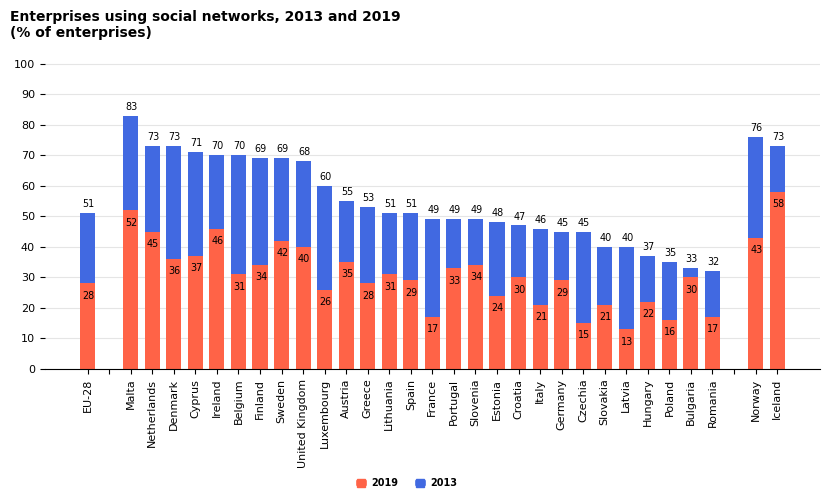

In [19]:
#FIGURE 2: graph

r = range(len(figure2_countries_spaced))

figure2_years = ['2013','2019']

colors = ['tomato', 'royalblue']

fig, ax = plt.subplots(figsize=(10, 4))
ax.grid(True, which = 'major', axis = 'y', color ='grey', linestyle = '-', alpha = 0.2) #grey lines
sns.despine(top=True, right=True, left=True, bottom=False) #remove spines
ax.set_axisbelow(True) #set the grid below the bars
plt.xticks(r, figure2_countries_spaced, rotation= 90) #x labels
ax.set_ylim(0, 101)
ax.tick_params(axis = 'both', which = 'major', labelsize = 8) #size of labels in axis
plt.yticks(np.arange(0, 101, step=10))

ax.get_xticklabels()[1].set_color("w")
ax.get_xticklabels()[30].set_color("w")

barWidth = 0.7
bars_2013 = plt.bar(r, figure2_2013_spaced, color=colors[0], width=barWidth, label=figure2_years[0])

bars_2019 = plt.bar(r, figure2_2019_spaced, bottom=figure2_2013_spaced, color=colors[1], width=barWidth, label=figure2_years[1])

i = 0
for bar_2013, bar_2019 in zip(bars_2013,bars_2019):
    h_2013 = bar_2013.get_height()
    h_2019 = bar_2019.get_height()
    x_2013 = bar_2013.get_x()
    x_2019 = bar_2019.get_x()
    x = x_2013 + x_2019
    h = h_2013 + h_2019
    #c = np.where(bars_2013[bar_2013]=='space','white','black')
    #c = np.where(bars_2013.index()==1,'white','black')
    if (i != 1) and (i != 30):
        plt.text(x_2019 + barWidth/6.5, h + 2, h, fontsize='x-small')
        plt.text(x_2013 + barWidth/6.5, h_2013 - 5, h_2013, fontsize='x-small')
    i = i+1

#legend
leg_2019 = Line2D([0],[0], lw=4, color='tomato', label='2019', marker='s')
leg_2013 = Line2D([0],[0], lw=4, color='royalblue', label='2013', marker='s')

leg = ax.legend(handles=[leg_2019,leg_2013], frameon=False, loc=(0.4, -.4), ncol=2, prop={'weight':'bold','size':'7'}, labelspacing=0.5, handlelength=0.5)

ax.set_title('Enterprises using social networks, 2013 and 2019 \n(% of enterprises)', fontsize=10, fontweight='bold', horizontalalignment = 'left', x = -0.045, y =1.05)


## Types of social media used by enterprise size and economic activity

### Figure 3

#### Step 1: Understanding the graph

- the graph corresponds to a grouped-bar plot
- each group of bars corresponds to a different type of social media and each bar within a group represents a different enterprise size class
- the values displayed show the percentage of enterprises using social media

#### Step 2: Data extraction and preparation

- dataset code used: `"isoc_cismt"`;
- the dataframes were created according to the different size classes and display the percentage values in a specific order: social network first, multi-media sharing websites second, blog or microblogs third and wiki-based tools last;

In [20]:
#FIGURE 3: data
#source: Eurostat API (isoc_cismt)

#get data
figure3_source = 'isoc_cismt?precision=1&geo=EU28&unit=PC_ENT&indic_is=E_SM1_BLOG&indic_is=E_SM1_CNTSHR&indic_is=E_SM1_SNET&indic_is=E_SM1_WIKI&sizen_r2=L_C10_S951_XK&sizen_r2=M_C10_S951_XK&sizen_r2=S_C10_S951_XK&unitLabel=label&time=2019'

dataframe_figure3 = client.get_dataset(figure3_source).to_dataframe().set_index('indic_is')

media_order = ['E_SM1_SNET','E_SM1_CNTSHR','E_SM1_BLOG','E_SM1_WIKI']

figure3_bars_large = dataframe_figure3[(dataframe_figure3['sizen_r2'] == 'L_C10_S951_XK')].reindex(media_order)['values'].tolist()

figure3_bars_medium = dataframe_figure3[(dataframe_figure3['sizen_r2'] == 'M_C10_S951_XK')].reindex(media_order)['values'].tolist()

figure3_bars_small = dataframe_figure3[(dataframe_figure3['sizen_r2'] == 'S_C10_S951_XK')].reindex(media_order)['values'].tolist()


#### Step 3: Plotting

- once again, the way we established the position of each bar was by adjusting the xticks according to the length of the array containing the social media types: using `range(len())` command
- for ordering the bars within each group, we represented the medium class values in the middle of the xtick and the bars for the other classes on the left/right side, either by substracting or by adding one bar's width value to the original xtick;
- the values on top of the bars were displayed by using their height and x-position values as coordinates, with a little spacing adjustment; 

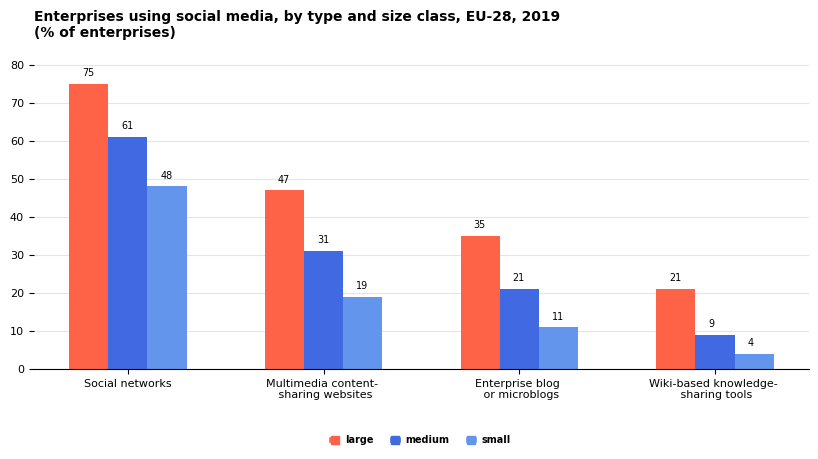

In [21]:
#FIGURE 3: graph

media_types = ['Social networks','Multimedia content- \n sharing websites','Enterprise blog \n or microblogs','Wiki-based knowledge- \n sharing tools']

sizes = ['large','medium','small']

colors = ['tomato', 'royalblue', 'cornflowerblue']

r = np.arange(len(media_types))

fig, ax = plt.subplots(figsize=(10, 4))
ax.grid(True, which = 'major', axis = 'y', color ='grey', linestyle = '-', alpha = 0.2) #grey lines
sns.despine(top=True, right=True, left=True, bottom=False) #remove spines
ax.set_axisbelow(True) #set the grid below the bars
plt.xticks(r, media_types, rotation= 0) #x labels
ax.set_ylim(0, 81)
ax.tick_params(axis = 'both', which = 'major', labelsize = 8) #size of labels in axis
plt.yticks(np.arange(0, 81, step=10))
barWidth = 0.2 #width of bars

bars_large = plt.bar(r - barWidth, figure3_bars_large, color=colors[0], width=barWidth, label=sizes[0])

bars_medium = plt.bar(r, figure3_bars_medium, color=colors[1], width=barWidth, label=sizes[1])

bars_small = plt.bar(r + barWidth, figure3_bars_small, color=colors[2], width=barWidth, label=sizes[2])

for bars_large, bars_medium, bars_small in zip(bars_large,bars_medium,bars_small):
    h_large = bars_large.get_height()
    h_medium = bars_medium.get_height()
    h_small = bars_small.get_height()
    x_large = bars_large.get_x()
    x_medium = bars_medium.get_x()
    x_small = bars_small.get_x()
    plt.text(x_large + barWidth/3, h_large +2, h_large, fontsize='x-small')
    plt.text(x_medium + barWidth/3, h_medium +2, h_medium, fontsize='x-small')
    plt.text(x_small + barWidth/3, h_small +2, h_small, fontsize='x-small')

#title
ax.set_title('Enterprises using social media, by type and size class, EU-28, 2019 \n(% of enterprises)', fontsize=10, fontweight='bold', horizontalalignment = 'left', x = 0.0, y =1.05)

#legend
leg_large = Line2D([0],[0], lw=4, color='tomato', label='large', marker='s')
leg_medium = Line2D([0],[0], lw=4, color='royalblue', label='medium', marker='s')
leg_small = Line2D([0],[0], lw=4, color='cornflowerblue', label='small', marker='s')

leg = ax.legend(handles=[leg_large,leg_medium,leg_small], frameon=False, loc=(0.38, -0.26), ncol=3, prop={'weight':'bold','size':'7'}, labelspacing=0.5, handlelength=0.5)


### Figure 4

#### Step 1: Understanding the graph

- the graph corresponds to an horizontal grouped-bar plot;
- each group of bars corresponds to a different economic activity and each bar within a group represents a different social media type;
- the values displayed show the percentage of enterprises using social media

#### Step 2: Data extraction and preparation

- dataset code used: `"isoc_cismt"`;
- the dataframes were created according to the different economic activities and display the percentage values in a specific order: social network first, multi-media sharing websites second, blog or microblogs third and wiki-based tools last;

In [22]:
#FIGURE 4: data
#source: Eurostat API (isoc_cismt)

#get data
figure4_source = 'isoc_cismt?precision=1&geo=EU28&unit=PC_ENT&indic_is=E_SM1_BLOG&indic_is=E_SM1_CNTSHR&indic_is=E_SM1_SNET&indic_is=E_SM1_WIKI&sizen_r2=10_C10_33&sizen_r2=10_D35_E39&sizen_r2=10_F41_43&sizen_r2=10_G45_47&sizen_r2=10_G47&sizen_r2=10_H49_53&sizen_r2=10_I55&sizen_r2=10_J58_63&sizen_r2=10_L68&sizen_r2=10_M69_74&sizen_r2=10_N77_82&unitLabel=label&time=2019'

dataframe_figure4 = client.get_dataset(figure4_source).to_dataframe().set_index('sizen_r2')

types_order = ['10_F41_43','10_H49_53','10_D35_E39','10_C10_33','10_L68','10_N77_82','10_M69_74','10_G45_47','10_G47','10_J58_63','10_I55']

figure4_network = dataframe_figure4[(dataframe_figure4['indic_is'] == 'E_SM1_SNET')].reindex(types_order)['values'].tolist()

figure4_multimedia = dataframe_figure4[(dataframe_figure4['indic_is'] == 'E_SM1_CNTSHR')].reindex(types_order)['values'].tolist()

figure4_blog = dataframe_figure4[(dataframe_figure4['indic_is'] == 'E_SM1_BLOG')].reindex(types_order)['values'].tolist()

figure4_wiki = dataframe_figure4[(dataframe_figure4['indic_is'] == 'E_SM1_WIKI')].reindex(types_order)['values'].tolist()


#### Step 3: Plotting

- this time, the position of each bar was set based on the y-axis and also according to the length of the array containing the economic activities: using `range(len())` command
- once again, for ordering the bars within each group, we represented the bars for the wiki-based tools values in the middle of the yticks and the bars for the types classes sequentially on top, by multiplying the bar's default size and adding it to the original ytick;
- when using the plot function, the bar's position parameter is only associated with the y-axis as the barh function is instead used;

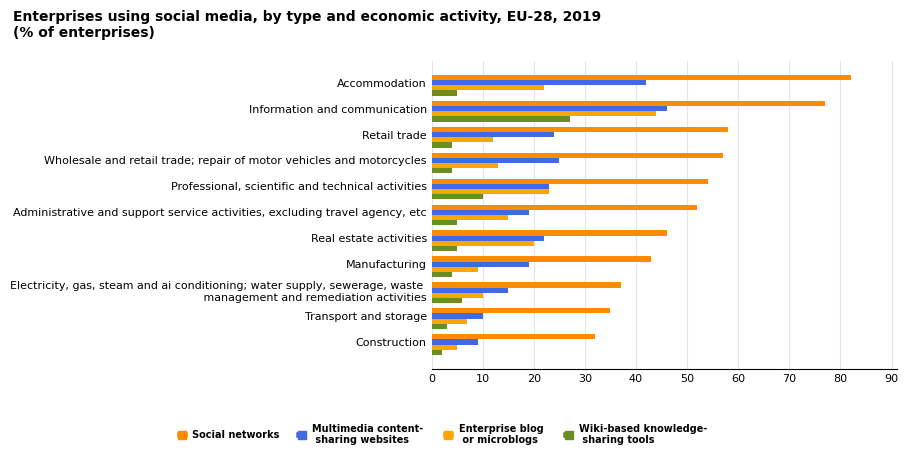

In [23]:
#FIGURE 4: graph

economic_activities = ['Construction','Transport and storage','Electricity, gas, steam and ai conditioning; water supply, sewerage, waste \n management and remediation activities','Manufacturing','Real estate activities','Administrative and support service activities, excluding travel agency, etc','Professional, scientific and technical activities','Wholesale and retail trade; repair of motor vehicles and motorcycles','Retail trade','Information and communication','Accommodation']

media_types = ['Wiki-based knowledge- \n sharing tools','Enterprise blog \n or microblogs','Multimedia content- \n sharing websites','Social networks']

colors = ['olivedrab','orange','royalblue','darkorange']

r = np.arange(len(economic_activities))

fig, ax = plt.subplots(figsize=(6, 4))
ax.grid(True, which = 'major', axis = 'x', color ='grey', linestyle = '-', alpha = 0.2) #grey lines
sns.despine(top=True, right=True, left=True, bottom=False) #remove spines
ax.set_axisbelow(True) #set the grid below the bars
barSize = 2.2/len(economic_activities) #width of bars
plt.yticks(r + barSize*2, economic_activities, rotation= 0) #y labels
ax.set_xlim(0,91)
ax.tick_params(axis = 'both', which = 'major', length=0, labelsize = 8) #size of labels in axis
plt.xticks(np.arange(0, 91, step=10))

#ax.set(yticks=ind + width, yticklabels=df.graph, ylim=[2*width - 1, len(df)])

bars_wiki = plt.barh(r, figure4_wiki, align= 'center', color=colors[0], height=barSize, label=media_types[0])

bars_blog = plt.barh(r + barSize, figure4_blog, align= 'center', color=colors[1], height=barSize, label=media_types[1])

bars_multimedia = plt.barh(r + barSize*2, figure4_multimedia, align= 'center', color=colors[2], height=barSize, label=media_types[2])

bars_network = plt.barh(r + barSize*3, figure4_network, align= 'center', color=colors[3], height=barSize, label=media_types[3])

#title
ax.set_title('Enterprises using social media, by type and economic activity, EU-28, 2019 \n(% of enterprises)', fontsize=10, fontweight='bold', horizontalalignment = 'left', x = -0.9, y =1.05)

#legend
leg_snet = Line2D([0],[0], lw=4, color='darkorange', label='Social networks', marker='s')
leg_cntshr = Line2D([0],[0], lw=4, color='royalblue', label='Multimedia content- \n sharing websites', marker='s')
leg_blog = Line2D([0],[0], lw=4, color='orange', label='Enterprise blog \n or microblogs', marker='s')
leg_wiki = Line2D([0],[0], lw=4, color='olivedrab', label='Wiki-based knowledge- \n sharing tools', marker='s')

leg = ax.legend(handles=[leg_snet,leg_cntshr,leg_blog,leg_wiki], frameon=False, loc=(-0.55, -.26), ncol=4, prop={'weight':'bold','size':'7'}, labelspacing=0.2, handlelength=0.5)


## Purposes of using social media

In [24]:
#FIGURE 5: data
#source: Eurostat Data Browser (isoc_cismt)

figure5_source = 'isoc_cismp?precision=1&geo=EU28&unit=PC_ENT&indic_is=E_SM_PADVERT&indic_is=E_SM_PBPCOLL&indic_is=E_SM_PCUDEV&indic_is=E_SM_PCUQOR&indic_is=E_SM_PEXCHVOK&indic_is=E_SM_PRCR&sizen_r2=10_C10_S951_XK&unitLabel=label&time=2013&time=2015&time=2017&time=2019'

dataframe_figure5 = client.get_dataset(figure5_source).to_dataframe()

dataframe_figure5_develop = dataframe_figure5.loc[dataframe_figure5['indic_is'] == 'E_SM_PADVERT'].groupby(by = 'time')['values'].sum()
dataframe_figure5_obtain = dataframe_figure5.loc[dataframe_figure5['indic_is'] == 'E_SM_PCUQOR'].groupby(by = 'time')['values'].sum()
dataframe_figure5_recruit = dataframe_figure5.loc[dataframe_figure5['indic_is'] == 'E_SM_PRCR'].groupby(by = 'time')['values'].sum()
dataframe_figure5_exchange = dataframe_figure5.loc[dataframe_figure5['indic_is'] == 'E_SM_PEXCHVOC'].groupby(by = 'time')['values'].sum()
dataframe_figure5_involve = dataframe_figure5.loc[dataframe_figure5['indic_is'] == 'E_SM_PCUDEV'].groupby(by = 'time')['values'].sum()
dataframe_figure5_collaborate = dataframe_figure5.loc[dataframe_figure5['indic_is'] == 'E_SM_PBPCOLL'].groupby(by = 'time')['values'].sum()


Text(-0.03, 1.05, 'Enterprises using social media, by purpose of use, EU-28, \n2013, 2015, 2017 and 2019 \n(% of enterprises)')

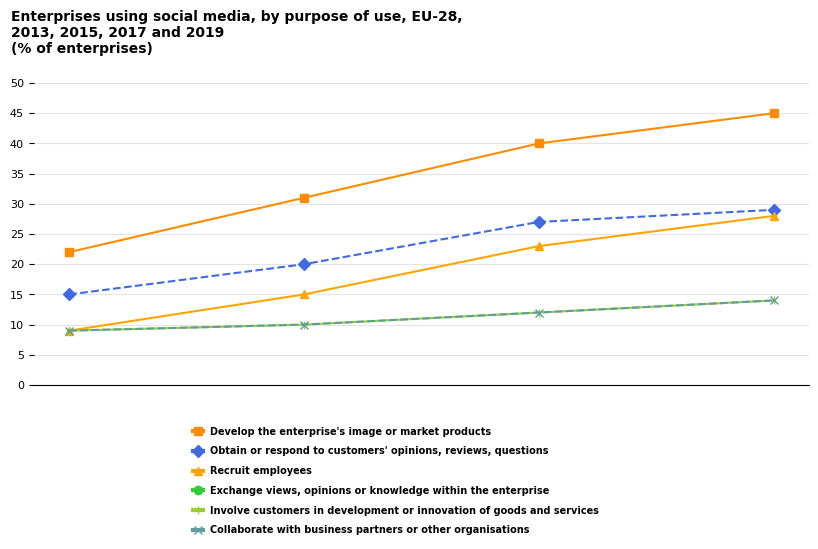

In [25]:
#FIGURE 5: graph

colors = ['darkorange','royalblue','orange','limegreen','yellowgreen','cadetblue']

#size of graph
fig, ax = plt.subplots(figsize=(10, 4))

#grid
plt.style.use('default') #aesthetic of sheet
ax.grid(True, which = 'major', axis = 'y' , color ='grey', linestyle = '-', alpha = 0.2) #grey lines
sns.despine(top=True, right=True, left=True, bottom=False) #remove spines
ax.tick_params(axis = 'both',which = 'major' , labelsize = 8) #size of labels in axis
ax.xaxis.set_major_locator(ticker.FixedLocator([2013, 2015, 2017, 2019]))

#scale of graph
plt.ylim(0,51)
plt.yticks(np.arange(0, 51, step=5))

#plot the data
plt.plot(dataframe_figure5_develop, color=colors[0], marker ='s')
plt.plot(dataframe_figure5_obtain, color=colors[1], marker ='D', linestyle = 'dashed')
plt.plot(dataframe_figure5_recruit, color=colors[2], marker ='^')
plt.plot(dataframe_figure5_exchange, color=colors[3], marker ='o')
plt.plot(dataframe_figure5_involve, color=colors[4], marker ='|')
plt.plot(dataframe_figure5_collaborate, color=colors[5], marker ='x', linestyle = 'dashed')

#legend
leg_develop = Line2D([0],[0], lw=3, color=colors[0], label='Develop the enterprise\'s image or market products', marker='s')
leg_obtain = Line2D([0],[0], lw=3, color=colors[1], label='Obtain or respond to customers\' opinions, reviews, questions', marker='D')
leg_recruit = Line2D([0],[0], lw=3, color=colors[2], label='Recruit employees', marker='^')
leg_exchange = Line2D([0],[0], lw=3, color=colors[3], label='Exchange views, opinions or knowledge within the enterprise', marker='o')
leg_involve = Line2D([0],[0], lw=3, color=colors[4], label='Involve customers in development or innovation of goods and services', marker='|')
leg_collaborate = Line2D([0],[0], lw=3, color=colors[5], label='Collaborate with business partners or other organisations', marker='x')

leg = ax.legend(handles=[leg_develop,leg_obtain,leg_recruit,leg_exchange,leg_involve,leg_collaborate], frameon=False, loc=(0.2, -.5), ncol=1, prop={'weight':'bold','size':'7'}, labelspacing=1, handlelength=1)

#title
ax.set_title('Enterprises using social media, by purpose of use, EU-28, \n2013, 2015, 2017 and 2019 \n(% of enterprises)', fontsize=10, fontweight='bold', horizontalalignment = 'left', x = -0.03, y =1.05)

## Purposes of using social media by size of enterprises

In [26]:
#FIGURE 6: data
#source: Eurostat Data Browser (isoc_cismp)

figure6_source = 'isoc_cismp?precision=1&geo=EU28&unit=PC_ENT_SM&indic_is=E_SM_PADVERT&indic_is=E_SM_PBPCOLL&indic_is=E_SM_PCUDEV&indic_is=E_SM_PCUQOR&indic_is=E_SM_PEXCHVOK&indic_is=E_SM_PRCR&sizen_r2=L_C10_S951_XK&sizen_r2=M_C10_S951_XK&sizen_r2=S_C10_S951_XK&unitLabel=label&time=2019'

dataframe_figure6 = client.get_dataset(figure6_source).to_dataframe().set_index('indic_is')

purpose_order = ['E_SM_PADVERT','E_SM_PCUQOR','E_SM_PRCR','E_SM_PEXCHVOK','E_SM_PCUDEV','E_SM_PBPCOLL']

figure6_bars_large = dataframe_figure6[(dataframe_figure6['sizen_r2'] == 'L_C10_S951_XK')].reindex(purpose_order)['values'].tolist()

figure6_bars_medium = dataframe_figure6[(dataframe_figure6['sizen_r2'] == 'M_C10_S951_XK')].reindex(purpose_order)['values'].tolist()

figure6_bars_small = dataframe_figure6[(dataframe_figure6['sizen_r2'] == 'S_C10_S951_XK')].reindex(purpose_order)['values'].tolist()


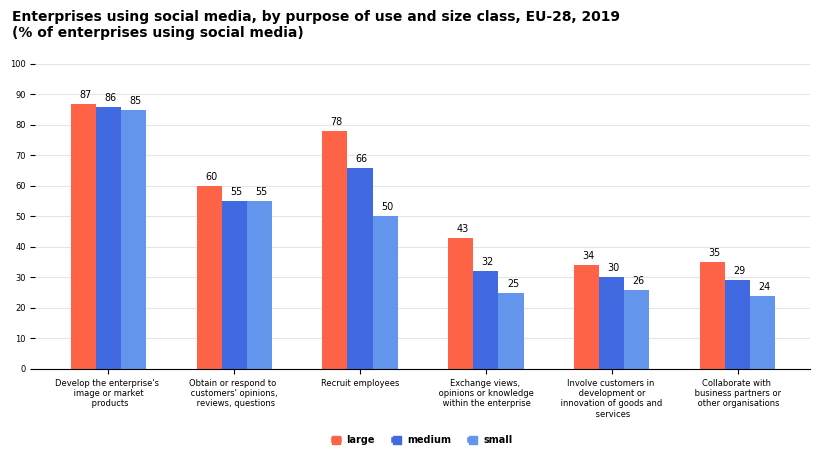

In [27]:
#FIGURE 6: graph

purposes = ['Develop the enterprise\'s \n image or market \n products','Obtain or respond to \n customers\' opinions, \n reviews, questions','Recruit employees','Exchange views, \n opinions or knowledge \n within the enterprise','Involve customers in \n development or \n innovation of goods and \n services','Collaborate with \n business partners or \n other organisations']

sizes = ['large','medium','small']

colors = ['tomato', 'royalblue', 'cornflowerblue']

r = np.arange(len(purposes))

fig, ax = plt.subplots(figsize=(10, 4))
ax.grid(True, which = 'major', axis = 'y', color ='grey', linestyle = '-', alpha = 0.2) #grey lines
sns.despine(top=True, right=True, left=True, bottom=False) #remove spines
ax.set_axisbelow(True) #set the grid below the bars
plt.xticks(r, purposes, rotation= 0) #x labels
ax.set_ylim(0, 101)
ax.tick_params(axis = 'both', which = 'major', labelsize = 6) #size of labels in axis
plt.yticks(np.arange(0, 101, step=10))
barWidth = 0.2 #width of bars

bars_large = plt.bar(r - barWidth, figure6_bars_large, color=colors[0], width=barWidth, label=sizes[0])

bars_medium = plt.bar(r, figure6_bars_medium, color=colors[1], width=barWidth, label=sizes[1])

bars_small = plt.bar(r + barWidth, figure6_bars_small, color=colors[2], width=barWidth, label=sizes[2])

for bars_large, bars_medium, bars_small in zip(bars_large,bars_medium,bars_small):
    h_large = bars_large.get_height()
    h_medium = bars_medium.get_height()
    h_small = bars_small.get_height()
    x_large = bars_large.get_x()
    x_medium = bars_medium.get_x()
    x_small = bars_small.get_x()
    plt.text(x_large + barWidth/3, h_large +2, h_large, fontsize='x-small')
    plt.text(x_medium + barWidth/3, h_medium +2, h_medium, fontsize='x-small')
    plt.text(x_small + barWidth/3, h_small +2, h_small, fontsize='x-small')

#title
ax.set_title('Enterprises using social media, by purpose of use and size class, EU-28, 2019 \n(% of enterprises using social media)', fontsize=10, fontweight='bold', horizontalalignment = 'left', x = -0.03, y =1.05)

#legend
leg_large = Line2D([0],[0], lw=4, color='tomato', label='large', marker='s')
leg_medium = Line2D([0],[0], lw=4, color='royalblue', label='medium', marker='s')
leg_small = Line2D([0],[0], lw=4, color='cornflowerblue', label='small', marker='s')

leg = ax.legend(handles=[leg_large,leg_medium,leg_small], frameon=False, loc=(0.38, -0.26), ncol=3, prop={'weight':'bold','size':'7'}, labelspacing=0.5, handlelength=0.5)


## Purposes of using social media by economic activity

In [28]:
#FIGURE 7: data
#source: Eurostat Data Browser (isoc_cismp)

figure7_source = 'isoc_cismp?precision=1&geo=EU28&unit=PC_ENT_SM&indic_is=E_SM_PADVERT&indic_is=E_SM_PCUDEV&indic_is=E_SM_PCUQOR&indic_is=E_SM_PRCR&sizen_r2=10_C10_33&sizen_r2=10_D35_E39&sizen_r2=10_F41_43&sizen_r2=10_G45_47&sizen_r2=10_G47&sizen_r2=10_H49_53&sizen_r2=10_I55&sizen_r2=10_J58_63&sizen_r2=10_L68&sizen_r2=10_M69_74&sizen_r2=10_N77_82&unitLabel=label&time=2019'

dataframe_figure7 = client.get_dataset(figure7_source).to_dataframe().set_index('sizen_r2')

activities_order = ['10_H49_53','10_F41_43','10_D35_E39','10_N77_82','10_M69_74','10_C10_33','10_J58_63','10_L68','10_G45_47','10_G47','10_I55']

figure7_involve = dataframe_figure7[(dataframe_figure7['indic_is'] == 'E_SM_PCUDEV')].reindex(activities_order)['values'].tolist()

figure7_recruit = dataframe_figure7[(dataframe_figure7['indic_is'] == 'E_SM_PRCR')].reindex(activities_order)['values'].tolist()

figure7_obtain = dataframe_figure7[(dataframe_figure7['indic_is'] == 'E_SM_PCUQOR')].reindex(activities_order)['values'].tolist()

figure7_develop = dataframe_figure7[(dataframe_figure7['indic_is'] == 'E_SM_PADVERT')].reindex(activities_order)['values'].tolist()


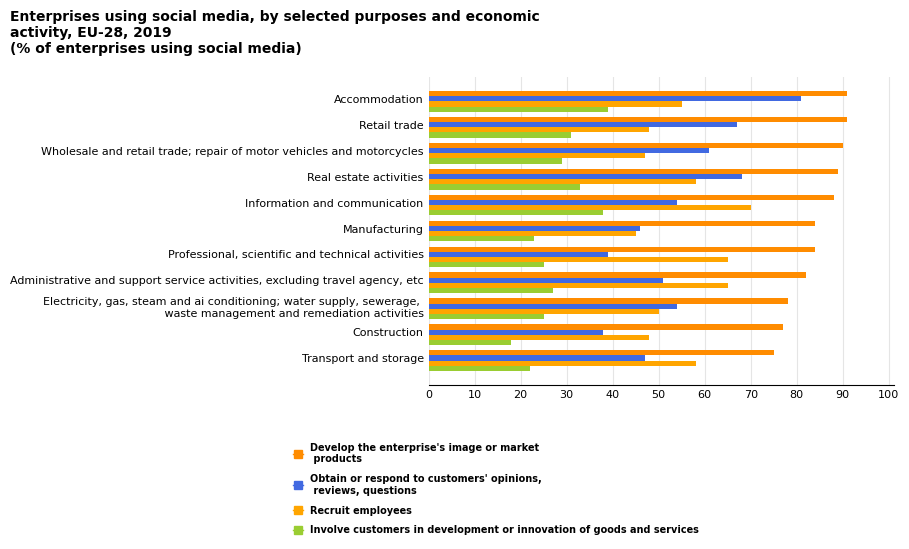

In [29]:
#FIGURE 7: graph

economic_activities = ['Transport and storage','Construction','Electricity, gas, steam and ai conditioning; water supply, sewerage, \n waste management and remediation activities','Administrative and support service activities, excluding travel agency, etc','Professional, scientific and technical activities','Manufacturing','Information and communication','Real estate activities','Wholesale and retail trade; repair of motor vehicles and motorcycles','Retail trade','Accommodation']

purposes = ['Involve customers in \n development or \n innovation of goods and \n services','Recruit employees','Obtain or respond to \n customers\' opinions, \n reviews, questions','Develop the enterprise\'s \n image or market \n products']

colors = ['yellowgreen','orange','royalblue','darkorange']

r = np.arange(len(economic_activities))

fig, ax = plt.subplots(figsize=(6, 4))
ax.grid(True, which = 'major', axis = 'x', color ='grey', linestyle = '-', alpha = 0.2) #grey lines
sns.despine(top=True, right=True, left=True, bottom=False) #remove spines
ax.set_axisbelow(True) #set the grid below the bars
barSize = 2.2/len(economic_activities) #width of bars
plt.yticks(r + barSize*2, economic_activities, rotation= 0) #y labels
ax.set_xlim(0,101)
ax.tick_params(axis = 'both', which = 'major', length=0, labelsize = 8) #size of labels in axis
plt.xticks(np.arange(0, 101, step=10))

#ax.set(yticks=ind + width, yticklabels=df.graph, ylim=[2*width - 1, len(df)])

bars_involve = plt.barh(r, figure7_involve, align= 'center', color=colors[0], height=barSize, label=purposes[0])

bars_recruit = plt.barh(r + barSize, figure7_recruit, align= 'center', color=colors[1], height=barSize, label=purposes[1])

bars_obtain = plt.barh(r + barSize*2, figure7_obtain, align= 'center', color=colors[2], height=barSize, label=purposes[2])

bars_develop = plt.barh(r + barSize*3, figure7_develop, align= 'center', color=colors[3], height=barSize, label=purposes[3])

#title
ax.set_title('Enterprises using social media, by selected purposes and economic \nactivity, EU-28, 2019 \n(% of enterprises using social media)', fontsize=10, fontweight='bold', horizontalalignment = 'left', x = -0.9, y =1.05)

#legend
leg_develop = Line2D([0],[0], lw=1, color=colors[3], label='Develop the enterprise\'s image or market \n products', marker='s')
leg_obtain = Line2D([0],[0], lw=1, color=colors[2], label='Obtain or respond to customers\' opinions, \n reviews, questions', marker='s')
leg_recruit = Line2D([0],[0], lw=1, color=colors[1], label='Recruit employees', marker='s')
leg_involve = Line2D([0],[0], lw=1, color=colors[0], label='Involve customers in development or innovation of goods and services', marker='s')

leg = ax.legend(handles=[leg_develop,leg_obtain,leg_recruit,leg_involve], frameon=False, loc=(-0.3, -.5), ncol=1, prop={'weight':'bold','size':'7'}, labelspacing=1, handlelength=1)
